In [1]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from Bio import Entrez

DATA_PATH = "./data/"

In [2]:
def to_csv(filename:str, dataframe:pd.DataFrame):
    dataframe.to_csv(os.path.join(DATA_PATH, filename+".csv"), encoding="utf-8", sep=",", index=False)
    print(f"DataFrame successfully saved in {filename}")
def read_csv(filename:str):
    _df = pd.read_csv(os.path.join(DATA_PATH, filename+".csv"), encoding="utf-8", sep=",")
    print(_df.columns)
    print(f"Dataset shape {_df.shape}")
    return _df
def words_count(text):
    text = re.sub(r'\s+', ' ', text)
    return len(text.split())
def chars_count(text):
    text = re.sub(r'\s+', ' ', text)
    return len(text)
def get_pubmed_document(pmid):
    Entrez.email = "your_email@example.com"  # Set your email address for PubMed access

    try:
        # Fetch the article summary using PubMed ID
        handle = Entrez.efetch(db="pubmed", id=str(pmid), retmode="xml")
        record = Entrez.read(handle)
        handle.close()
        
        return record
    except Exception as e:
        print(f"Error: {e}")
        return None

In [34]:
########
#Write you script to get the articles abstracts, title, authors using the PubMed IDs provided in the AnnotationOnly.csv .....#
# or contact Sameh.Frihat@uni-due.de for ready CSV file.
########

In [25]:
df = read_csv("annotations")
df.head()

Index(['tittle', 'topics', 'ENreadability', 'DEreadability', 'ENtechnicality',
       'DEtechnicality', 'user', 'ID', 'authors', 'institutes', 'date',
       'topic', 'english_abstract', 'german_abstract', 'collaborators'],
      dtype='object')
Dataset shape (209, 15)


,tittle,topics,ENreadability,DEreadability,ENtechnicality,DEtechnicality,user,ID,authors,institutes,date,topic,english_abstract,german_abstract,collaborators
0,[Pre travel advice - a study among Swiss gener...,['Public Health'],10,8,8,6,334,23732446,"[{'name': 'Walz A', 'institutes': ['1']}, {'na...",{'1': 'Institut für Sozial- und Präventivmediz...,"('2013', 'Jun', '')",Ther Umsch,\tUp to 65 % of travellers seek pre-travel adv...,\tPublisher: Bis zu 65 % der Reisenden suchen ...,NaN
1,[Important classifications and scores in cardi...,['Cardiology'],15,17,7,3,954,24091338,"[{'name': 'Bonetti PO', 'institutes': ['1']}]","{'1': 'Abteilung für Kardiologie, Departement ...","('2013', 'Oct', '')",Ther Umsch,\tClassifications and scores play a fundamenta...,\tPublisher: In der Kardiologie werden diverse...,NaN
2,[Health Promotion and Disease Prevention - Res...,['Public Health'],14,13,10,0,618,29069690,"[{'name': 'Thaiss H', 'institutes': ['1']}, {'...",{'1': 'Bundeszentrale für gesundheitliche Aufk...,"('2017', 'Oct', '25')",Gesundheitswesen,\tThe increase in so-called lifestyle-related ...,\tPublisher: Der Anstieg der sogenannten Zivil...,NaN
3,[Screening of executive functions in patients ...,"['Neurology', 'Urology']",13,13,6,4,645,29186725,"[{'name': 'Scheffels JF', 'institutes': ['1']}...","{'1': 'Universitätsklinikum Köln, Neurologie.'...","('2017', 'Nov', '29')",Fortschr Neurol Psychiatr,\tParkinson's disease (PD) is the second most ...,\tPublisher: Morbus Parkinson ist nach der Dem...,NaN
4,[Sociology as a Major Factor for the Psychiatr...,['Psychiatry'],18,18,4,9,10,29237198,"[{'name': 'Söhner F', 'institutes': ['1', '2']...","{'1': 'Institut für Geschichte, Theorie und Et...","('2017', 'Dec', '13')",Psychiatr Prax,\tOBJECTIVE: This paper examines the influence...,\tPublisher: ANLIEGEN: Untersuchung des Einflu...,NaN


In [26]:
#average length of english abstracts? 
#words
print(f"avg words in english abstracts: {df['english_abstract'].apply(words_count).mean()}, std: {df['english_abstract'].apply(words_count).std()}")
#chars
print(f"avg chars in english abstracts: {df['english_abstract'].apply(chars_count).mean()}, std: {df['english_abstract'].apply(chars_count).std()}")

avg words in english abstracts: 215.44976076555025, std: 90.29299855960484
avg chars in english abstracts: 1480.0813397129186, std: 585.322033392832


In [27]:
#average length of german abstracts? 
#words
print(f"avg words in german abstracts: {df['german_abstract'].apply(words_count).mean()}, std: {df['german_abstract'].apply(words_count).std()}")
#chars
print(f"avg chars in german abstracts: {df['german_abstract'].apply(chars_count).mean()}, std: {df['german_abstract'].apply(chars_count).std()}")

avg words in german abstracts: 190.82296650717703, std: 77.63649424873877
avg chars in german abstracts: 1587.3062200956938, std: 616.2667551237369


In [28]:
# Ease of Reading Analysis
print(f"The average ease of reading score for English: {(df['ENreadability']*5).mean()}, std: {(df['ENreadability']*5).std()}")
print(f"The average ease of reading score for German: {(df['DEreadability']*5).mean()}, std: {(df['DEreadability']*5).std()}")

The average ease of reading score for English: 64.21052631578948, std: 21.54989033102842
The average ease of reading score for German: 61.50717703349282, std: 21.678401076706436


In [29]:
# Technicality Analysis
print(f"The average Technicality score for English: {(df['ENtechnicality']*5).mean()}, std: {(df['ENtechnicality']*5).std()}")
print(f"The average Technicality score for German: {(df['DEtechnicality']*5).mean()}, std: {(df['DEtechnicality']*5).std()}")

The average Technicality score for English: 30.550239234449762, std: 10.026820400622418
The average Technicality score for German: 26.72248803827751, std: 12.81898837703948


Technicality ...


<ipython-input-30-2719d85a39a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["ENtechnicality"] *= 5
<ipython-input-30-2719d85a39a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["DEtechnicality"] *= 5


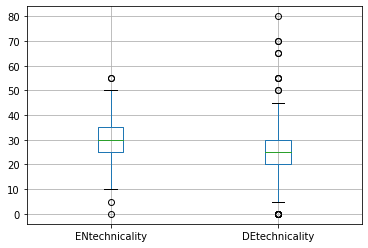

In [30]:
print("Technicality ...")
sub_df = df[["ENtechnicality", "DEtechnicality"]]
sub_df["ENtechnicality"] *= 5
sub_df["DEtechnicality"] *= 5
boxplot = sub_df[["ENtechnicality", "DEtechnicality"]].boxplot()  

Ease of reading ...


<ipython-input-31-2ba6ddbfc704>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["ENreadability"] *= 5
<ipython-input-31-2ba6ddbfc704>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["DEreadability"] *= 5


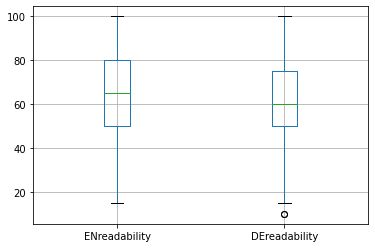

In [31]:
print("Ease of reading ...")
sub_df = df[["ENreadability", "DEreadability"]]
sub_df["ENreadability"] *= 5
sub_df["DEreadability"] *= 5
boxplot = sub_df[["ENreadability", "DEreadability"]].boxplot()  

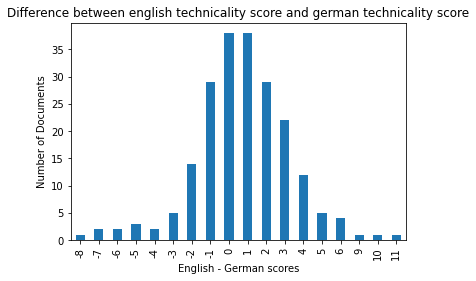

In [32]:
c = df["ENtechnicality"]-df["DEtechnicality"]
ax= c.value_counts().sort_index(ascending=True).plot(kind='bar')

ax.set_xlabel('English - German scores')
ax.set_ylabel('Number of Documents')
ax.set_title('Difference between english technicality score and german technicality score')
plt.show()


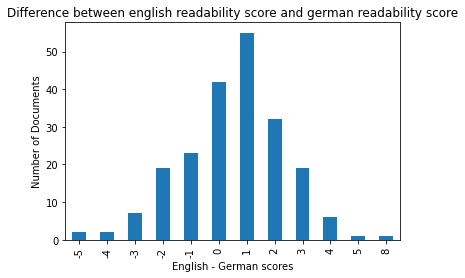

In [33]:
c = df["ENreadability"]-df["DEreadability"]
ax= c.value_counts().sort_index(ascending=True).plot(kind='bar')

ax.set_xlabel('English - German scores')
ax.set_ylabel('Number of Documents')
ax.set_title('Difference between english readability score and german readability score')
plt.show()